In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from utils import eda
import random as random
from os.path import join as pjoin

from utils import utils
#from utils import knn_validation
#from utils import knn_cross_validation
#from utils import nearest_prototypes

DATA_DIR = './data/'

In [2]:
def load_data():
    ## 0. To obtain reproducible results, we set the random seeds
    random.seed(2020)
    np.random.seed(2020)
    ## 1. Load training set

    dataset_file = pjoin(DATA_DIR, 'adult.data')
    testset_file = pjoin(DATA_DIR, 'adult.test')

    train = pd.read_csv(dataset_file, header=None, delimiter=r",\s+", engine='python')
    train.columns = [
        "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
    ]
    #train_samples = train.drop(columns="Income")
    #train_labels = train.Income
    #train.info()
    
    test = pd.read_csv(testset_file, header=None, delimiter=r",\s+", engine='python')
    test.columns = [
        "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
    ]
    
    #test_samples = test.drop(columns="Income")
    #test_labels = test.Income
    
    return train, test

In [89]:
def data_preprocess(data,is_train):
    data = eda.NativeCountry_replace(data)
    data = eda.WorkClass_replace(data)
    data = eda.Occupation_replace(data)
    data = eda.Education_remove(data)
    data = eda.Capital_merge(data)
    #train_samples, train_labels, weight = get_X_y(train)#drop also weights
    data = eda.NativeCountry_classify(data)
    """
    #without PCA
    data_samples = data.drop(columns="Income")
    
    data_labels = data.Income.map({"<=50K": 0, ">50K": 1})
    if is_train == False:
        data_labels = data.Income.map({"<=50K.": 0, ">50K.": 1})
        
    data_samples = eda.X_to_dummy(data_samples, None)
    print(data_samples.info())
    data_samples = data_samples.to_numpy()
    #data_samples = eda.standardization(data_samples)
    
    """

    #with PCA
    
    data_samples, data_labels, weight = eda.get_X_y(data,is_train)
    #print(len(weight))
    data_samples = eda.X_to_dummy(data_samples, None)
    print(data_samples.info())
    data_samples = data_samples.to_numpy()
    #data_samples = eda.standardization(data_samples)
    data_samples, _ = eda.PCA_with_weight(data_samples,weight)    

    return data_samples,data_labels

In [90]:
def preprocess(train,test):
    print("preprocessing training set")
    train_samples, train_labels = data_preprocess(train,True)
    
    print("preprocessing test set")
    test_samples, test_labels = data_preprocess(test,False)
    
    print("number of variables")
    print(len(train_samples[0]))
    print('done')
    return train_samples, train_labels, test_samples, test_labels

In [80]:
train, test = load_data()

In [81]:
train.head(10)

Age         WorkClass  fnlwgt  Education  EducationNum  \
0   39         State-gov   77516  Bachelors            13   
1   50  Self-emp-not-inc   83311  Bachelors            13   
2   38           Private  215646    HS-grad             9   
3   53           Private  234721       11th             7   
4   28           Private  338409  Bachelors            13   
5   37           Private  284582    Masters            14   
6   49           Private  160187        9th             5   
7   52  Self-emp-not-inc  209642    HS-grad             9   
8   31           Private   45781    Masters            14   
9   42           Private  159449  Bachelors            13   

           MaritalStatus         Occupation   Relationship   Race  Gender  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   CapitalGain  CapitalLoss  HoursPerWeek  NativeCountry Income  
0         2174            0            40  United-States  <=50K  
1            0            0            13  United-States  <=50K  
2            0            0            40  United-States  <=50K  
3            0            0            40  United-States  <=50K  
4            0            0            40           Cuba  <=50K  
5            0            0            40  United-States  <=50K  
6            0            0            16        Jamaica  <=50K  
7            0            0            45  United-States   >50K  
8        14084            0            50  United-States   >50K  
9         5178            0            40  United-States   >50K

In [91]:
train_samples, train_labels, test_samples, test_labels = preprocess(train,test)

preprocessing training set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Age                                  32561 non-null  int64
 1   EducationNum                         32561 non-null  int64
 2   HoursPerWeek                         32561 non-null  int64
 3   NativeCountry                        32561 non-null  int64
 4   CapitalChange                        32561 non-null  int64
 5   WorkClass_Federal-gov                32561 non-null  uint8
 6   WorkClass_Local-gov                  32561 non-null  uint8
 7   WorkClass_Private                    32561 non-null  uint8
 8   WorkClass_Self-emp-inc               32561 non-null  uint8
 9   WorkClass_State-gov                  32561 non-null  uint8
 10  MaritalStatus_Divorced               32561 non-null  uint8
 11  MaritalStatus_Married-AF-sp

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, make_scorer
def tune_pipe_LR(x_train,y_train,plot=True):
    print('tuning pipe...') 
    
    matthews = make_scorer(matthews_corrcoef)
    
    class_weight = [None,'balanced']
    #penalty = ['none','l2']
    C = np.geomspace(0.001, 100, 20)
    
    LR = LogisticRegression(random_state=2020)
    
    tuned_parameters =  {"class_weight": class_weight,
                         #"penalty": penalty,
                         "C":C
                        }
    stratified_kfold = StratifiedKFold(n_splits=5,random_state=2020, shuffle=True)
    
    CV = GridSearchCV(LR, tuned_parameters,return_train_score=True,
                    cv=stratified_kfold,
                    scoring=matthews,
                    verbose=4)
    
    
    CV.fit(x_train, y_train)
    print(CV.best_params_)
    
    df = pd.DataFrame(
        (
            dict(class_weight=d["class_weight"],C = d["C"], error=e, std=s)
            for d, e, s in zip(
                CV.cv_results_["params"],
                CV.cv_results_["mean_test_score"],
                CV.cv_results_["std_test_score"],
            )
        )
    )
    
    #plt.errorbar(n/df["C"], df["error"], yerr=df["std"])
    #plt.xscale("log")
    #plt.show()
    
    print('done')
    KNN = LogisticRegression(class_weight = CV.best_params_['class_weight'], C = CV.best_params_['C'],random_state=2020)
    return KNN,df

In [94]:
pipe,result = tune_pipe_LR(train_samples,train_labels)

tuning pipe...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.001, class_weight=None ......................................
[CV]  C=0.001, class_weight=None, score=0.39292124713355964, total=   0.5s
[CV] C=0.001, class_weight=None ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  C=0.001, class_weight=None, score=0.3847332815718119, total=   0.6s
[CV] C=0.001, class_weight=None ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  C=0.001, class_weight=None, score=0.3984210446454975, total=   0.5s
[CV] C=0.001, class_weight=None ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s


[CV]  C=0.001, class_weight=None, score=0.41089678989560136, total=   0.5s
[CV] C=0.001, class_weight=None ......................................
[CV]  C=0.001, class_weight=None, score=0.3742114724168628, total=   0.6s
[CV] C=0.001, class_weight=balanced ..................................
[CV]  C=0.001, class_weight=balanced, score=0.48620257617699586, total=   0.4s
[CV] C=0.001, class_weight=balanced ..................................
[CV]  C=0.001, class_weight=balanced, score=0.4778424828534308, total=   0.5s
[CV] C=0.001, class_weight=balanced ..................................
[CV]  C=0.001, class_weight=balanced, score=0.5014097534400096, total=   0.4s
[CV] C=0.001, class_weight=balanced ..................................
[CV]  C=0.001, class_weight=balanced, score=0.5106743434517036, total=   0.4s
[CV] C=0.001, class_weight=balanced ..................................
[CV]  C=0.001, class_weight=balanced, score=0.49417216394897634, total=   0.4s
[CV] C=0.0018329807108324356, cla

[CV]  C=0.02069138081114789, class_weight=balanced, score=0.557698532890622, total=   0.6s
[CV] C=0.02069138081114789, class_weight=balanced ....................
[CV]  C=0.02069138081114789, class_weight=balanced, score=0.531665468276784, total=   0.6s
[CV] C=0.02069138081114789, class_weight=balanced ....................
[CV]  C=0.02069138081114789, class_weight=balanced, score=0.541463947003763, total=   0.5s
[CV] C=0.02069138081114789, class_weight=balanced ....................
[CV]  C=0.02069138081114789, class_weight=balanced, score=0.5672829406189492, total=   0.6s
[CV] C=0.02069138081114789, class_weight=balanced ....................
[CV]  C=0.02069138081114789, class_weight=balanced, score=0.5512781539032626, total=   0.6s
[CV] C=0.0379269019073225, class_weight=None .........................
[CV]  C=0.0379269019073225, class_weight=None, score=0.5648848017417945, total=   0.6s
[CV] C=0.0379269019073225, class_weight=None .........................
[CV]  C=0.0379269019073225, cl

[CV]  C=0.42813323987193913, class_weight=balanced, score=0.5542262194535804, total=   0.7s
[CV] C=0.42813323987193913, class_weight=balanced ....................
[CV]  C=0.42813323987193913, class_weight=balanced, score=0.5681519983086099, total=   0.6s
[CV] C=0.42813323987193913, class_weight=balanced ....................
[CV]  C=0.42813323987193913, class_weight=balanced, score=0.5614181788643487, total=   0.7s
[CV] C=0.7847599703514607, class_weight=None .........................
[CV]  C=0.7847599703514607, class_weight=None, score=0.5814409360394128, total=   0.8s
[CV] C=0.7847599703514607, class_weight=None .........................
[CV]  C=0.7847599703514607, class_weight=None, score=0.5387072679499619, total=   0.8s
[CV] C=0.7847599703514607, class_weight=None .........................
[CV]  C=0.7847599703514607, class_weight=None, score=0.5560511061361115, total=   0.8s
[CV] C=0.7847599703514607, class_weight=None .........................
[CV]  C=0.7847599703514607, class_wei

[CV]  C=8.858667904100823, class_weight=balanced, score=0.5630482568048611, total=   0.7s
[CV] C=16.23776739188721, class_weight=None ..........................
[CV]  C=16.23776739188721, class_weight=None, score=0.5775103050645854, total=   0.9s
[CV] C=16.23776739188721, class_weight=None ..........................
[CV]  C=16.23776739188721, class_weight=None, score=0.5371235079769079, total=   0.8s
[CV] C=16.23776739188721, class_weight=None ..........................
[CV]  C=16.23776739188721, class_weight=None, score=0.556842925151784, total=   1.1s
[CV] C=16.23776739188721, class_weight=None ..........................
[CV]  C=16.23776739188721, class_weight=None, score=0.5625654836985944, total=   0.9s
[CV] C=16.23776739188721, class_weight=None ..........................
[CV]  C=16.23776739188721, class_weight=None, score=0.528250894495141, total=   1.0s
[CV] C=16.23776739188721, class_weight=balanced ......................
[CV]  C=16.23776739188721, class_weight=balanced, score=

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.8min finished


{'C': 100.0, 'class_weight': 'balanced'}
done


In [95]:
print(result.sort_values(by=['error'],ascending=False))

   class_weight           C     error       std
39     balanced  100.000000  0.563103  0.010899
27     balanced    2.636651  0.562853  0.011101
25     balanced    1.438450  0.562324  0.006403
35     balanced   29.763514  0.562162  0.011501
37     balanced   54.555948  0.562074  0.011486
23     balanced    0.784760  0.561098  0.006896
19     balanced    0.233572  0.560238  0.006638
33     balanced   16.237767  0.559873  0.010938
31     balanced    8.858668  0.559190  0.008375
29     balanced    4.832930  0.558880  0.008059
17     balanced    0.127427  0.555628  0.010162
16         None    0.127427  0.554304  0.018290
20         None    0.428133  0.553938  0.018714
13     balanced    0.037927  0.553889  0.011155
21     balanced    0.428133  0.553880  0.012453
22         None    0.784760  0.553399  0.018680
24         None    1.438450  0.552916  0.018203
34         None   29.763514  0.552668  0.018004
38         None  100.000000  0.552593  0.017898
36         None   54.555948  0.552593  0

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: Income, Length: 16281, dtype: int64
[0 0 0 ... 0 0 0]


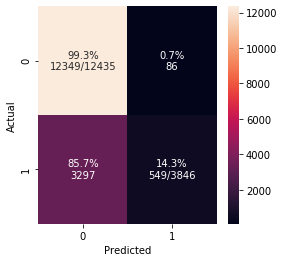

0.792211780603157


In [96]:
pipe.fit(train_samples,train_labels)
import utils.analysing as AN
from sklearn.metrics import accuracy_score
pred = pipe.predict(test_samples)
#print(accuracy_score(test_labels,pred))
AN.plot_confusion_matrix(test_labels,pred)
print(accuracy_score(test_labels,pred))

In [ ]:
import sklearn
y_score = pipe.fit(train_samples,train_labels).decision_function(test.drop('Income',axis=1))

fpr,tpr,the=sklearn.metrics.roc_curve(test['Income'],y_score)
sklearn.metrics.roc_auc_score(test['Income'],pred)
plt.plot(fpr,tpr,)

In [87]:
#from here

#no penalty
def tune_pipe_LR(x_train,y_train,plot=True):
    print('tuning pipe...') 
    
    class_weight = [None,'balanced']
    penalty = ['none','l2']
    C = np.geomspace(0.001, 100, 20)
    
    LR = LogisticRegression(random_state=2020)
    
    tuned_parameters =  {"class_weight": class_weight,
                         "penalty": penalty
                        }
    stratified_kfold = StratifiedKFold(n_splits=5,random_state=2020, shuffle=True)
    
    CV = GridSearchCV(LR, tuned_parameters,return_train_score=True,
                    cv=stratified_kfold,
                    scoring="accuracy",
                    verbose=4)
    
    
    CV.fit(x_train, y_train)
    print(CV.best_params_)
    
    df = pd.DataFrame(
        (
            dict(class_weight=d["class_weight"],penalty = d["penalty"], error=e, std=s)
            for d, e, s in zip(
                CV.cv_results_["params"],
                CV.cv_results_["mean_test_score"],
                CV.cv_results_["std_test_score"],
            )
        )
    )
    
    #plt.errorbar(n/df["C"], df["error"], yerr=df["std"])
    #plt.xscale("log")
    #plt.show()
    
    print('done')
    KNN = LogisticRegression(class_weight = CV.best_params_['class_weight'], penalty = 'none')
    return KNN,df

In [88]:
pipe,result = tune_pipe_LR(train_samples,train_labels)
print(result)

tuning pipe...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] class_weight=None, penalty=none .................................


ValueError: Unsupported set of arguments: The combination of penalty='none' and loss='logistic_regression' is not supported, Parameters: penalty='none', loss='logistic_regression', dual=False

In [45]:
pipe.fit(train_samples,train_labels)
import utils.analysing as AN
from sklearn.metrics import accuracy_score
pred = pipe.predict(test_samples)
#print(accuracy_score(test_labels,pred))
AN.plot_confusion_matrix(test_labels,pred)
print(accuracy_score(test_labels,pred))

ValueError: Unsupported set of arguments: The combination of penalty='none' and loss='logistic_regression' is not supported, Parameters: penalty='none', loss='logistic_regression', dual=False

In [47]:
#no penalty
def tune_pipe_LR(x_train,y_train,plot=True):
    print('tuning pipe...') 
    
    class_weight = [None,'balanced']
    penalty = ['none','l2']
    C = np.geomspace(0.001, 100, 20)
    matthews = make_scorer(matthews_corrcoef)
    LR = LogisticRegression(random_state=2020)
    
    tuned_parameters =  {"class_weight": class_weight,
                         "penalty": penalty
                        }
    stratified_kfold = StratifiedKFold(n_splits=5,random_state=2020, shuffle=True)
    
    CV = GridSearchCV(LR, tuned_parameters,return_train_score=True,
                    cv=stratified_kfold,
                    scoring=matthews,
                    verbose=4)
    
    
    CV.fit(x_train, y_train)
    print(CV.best_params_)
    
    df = pd.DataFrame(
        (
            dict(class_weight=d["class_weight"],penalty = d["penalty"], error=e, std=s)
            for d, e, s in zip(
                CV.cv_results_["params"],
                CV.cv_results_["mean_test_score"],
                CV.cv_results_["std_test_score"],
            )
        )
    )
    
    #plt.errorbar(n/df["C"], df["error"], yerr=df["std"])
    #plt.xscale("log")
    #plt.show()
    
    print('done')
    KNN = LogisticRegression(class_weight = CV.best_params_['class_weight'], penalty = 'none')
    return KNN,df

In [48]:
pipe = LogisticRegression(random_state=2020,penalty = 'none')
pipe,result = tune_pipe_LR(train_samples,train_labels)
print(result)

tuning pipe...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] class_weight=None, penalty=none .................................


ValueError: Unsupported set of arguments: The combination of penalty='none' and loss='logistic_regression' is not supported, Parameters: penalty='none', loss='logistic_regression', dual=False

In [49]:
pipe.fit(train_samples,train_labels)
import utils.analysing as AN
from sklearn.metrics import accuracy_score
pred = pipe.predict(test_samples)
#print(accuracy_score(test_labels,pred))
AN.plot_confusion_matrix(test_labels,pred)
print(accuracy_score(test_labels,pred))

ValueError: Unsupported set of arguments: The combination of penalty='none' and loss='logistic_regression' is not supported, Parameters: penalty='none', loss='logistic_regression', dual=False